# Inward remittance volumes by country and number of migrants, 1980-2019

## Data sources

*'The World Bank provides annual estimates of remittances flows globally (and bilaterally), based on national balance of payment statistics produced by central Banks and compiled by the IMF.'* 
[Commentary from Migration Data Portal](https://migrationdataportal.org/themes/remittances#data-sources). 

There are multiple methodological challenges in collecting the data:
* It could be under-reported as payments to UN staff and other multinationals can be counted as remittances; and remittance criteria is based on residence rather than migratory status 
* It could be over-reported as there have been multiple changes in measurement from 1980-2019, with some arguing that 80% of the increase from 1990 is due to measurement changes; and also not all payment channels are included, as it measurement only uses bank transfers and exclude money transfer operators and informal payment channels. 

Source data: [World Bank Data Catalogue](https://www.knomad.org/data/remittances), accessed 14th Feb 2021

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

In [256]:
df = pd.read_excel('/Users/bendixon/Documents/GitHub/python-sandbox/Inward_Remittance_Flows.xlsx')
df = df.transpose()
df = df.iloc[0:41,0:216]
countries = df.iloc[0,:] 
new_header = df.iloc[0] # take the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header
df = df.rename_axis("Year", axis="columns") # Renaming the index column as year (it was prev remittance vol)
df.head(3)

Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,Low-and Middle-Income Countries,World
1980,NaN,NaN,406,NaN,NaN,NaN,NaN,56,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8916,17624.2,35813.9
1981,NaN,NaN,447,NaN,NaN,NaN,NaN,42,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2946,17847.6,34887.2
1982,NaN,NaN,507,NaN,NaN,NaN,NaN,28,NaN,NaN,...,9.35478,NaN,NaN,NaN,NaN,NaN,NaN,32.8953,19286,36041.3


In [257]:
countries

0                          Afghanistan
1                              Albania
2                              Algeria
3                       American Samoa
4                              Andorra
                    ...               
211                        Yemen, Rep.
212                             Zambia
213                           Zimbabwe
214    Low-and Middle-Income Countries
215                              World
Name: Migrant remittance inflows (US$ million), Length: 216, dtype: object

### Checking that existing locations are within dataset 

In [258]:
country_list = []
for i in countries:
    country_list.append(i)

In [259]:
# Sendwave's current clients, describes only Ghana, Nigeria, Africa. 
# From https://www.sendwave.com/, then choosing "View available countries"
customer_list = ['Bangladesh', 'Ghana', 'Liberia', 'Nigeria', 'Senegal', 'Tanzania', 'Kenya', 'Uganda',
                 'Sri Lanka', "Cote d'Ivoire", 'Cameroon']

In [260]:
# Checking that all listed countries are named consistently in World Bank report
# This gives error "ValueError: 'Ivory Coast' is not in list" -> changed this and now it find them all!
j = 0
for i in customer_list: 
    country_list.index(i)
    j = j + 1
print("Total:",j)

Total: 11


## What is the spread of transaction volumes within country groups?

In this section, I break the current customers into three groups: 
* West Africa
* East Africa
* South Asia

I then look at the total remittance volumes for countries wihtin each group

In [261]:
# Customers in West Africa
w_africa_c = ['Ghana', 'Nigeria', 'Senegal', 'Liberia', "Cote d'Ivoire", 'Cameroon'] # Cameroon is central-west
e_africa_c = ['Tanzania', 'Uganda','Kenya']
s_asia_c = ['Bangladesh', 'Sri Lanka']

# Total markets
e_africa = ['Djibouti', 'Eritrea', 'Ethiopia', 'Somalia', 'Sudan', 'South Sudan', 'Madagascar', 'Mauritius',
 'Comoros', 'Seychelles', 'Uganda', 'Rwanda', 'Burundi', 'Kenya', 'Tanzania', 'Mozambique', 'Malawi', 
 'Zambia', 'Zimbabwe']

In [262]:
# Checking I've got all the countries from the list
print(len(customer_list))
print(len(w_africa_c)+len(e_africa_c)+len(s_asia_c))

11
11


In [263]:
# Building a DataFrame for West African countries
df_w = pd.DataFrame()
for i in w_africa_c:
    add = df[[i]].copy()
    df_w = pd.concat([df_w, add], axis=1)
df_w.head()

Year,Ghana,Nigeria,Senegal,Liberia,Cote d'Ivoire,Cameroon
1980,0.9,21.9466,77.0543,NaN,32.1848,29.3923
1981,1.4,16.1889,68.1923,NaN,30.9129,28.7048
1982,1.5,17.8184,66.3104,NaN,28.91,19.0197
1983,0.5,13.8043,58.9662,NaN,27.0294,28.0004
1984,4.7,11.7413,53.7582,NaN,24.9453,14.8298


### Remittances to West African countries

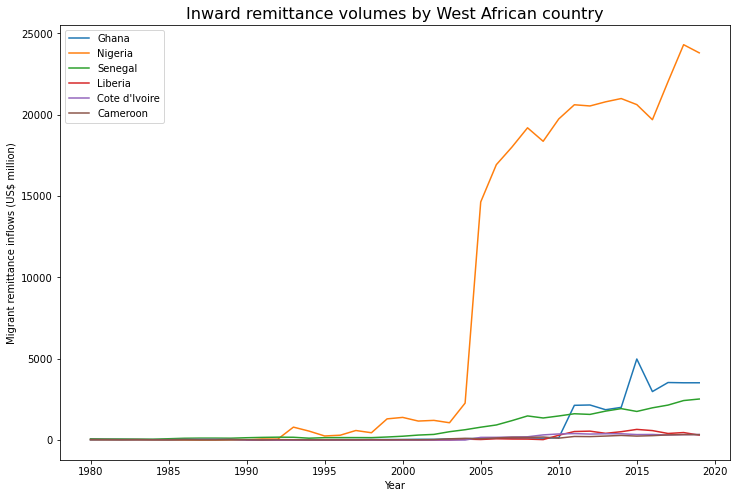

In [264]:
# Plot of remittance volumes per West African country
# https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html 
fig = plt.figure(figsize=(12,8))
ax0 = plt.axes()
ax0.plot(df_w)
plt.title("Inward remittance volumes by West African country",size=16)
plt.xlabel("Year")
plt.ylabel("Migrant remittance inflows (US$ million)")
ax0.legend(df_w)

### Remittances to East African countries

In [265]:
# Same thing for the East African countries
df_e = pd.DataFrame()
for i in e_africa_c:
    add = df[[i]].copy()
    df_e = pd.concat([df_e, add], axis=1)
df_e.head(2)

Year,Tanzania,Uganda,Kenya
1980,NaN,NaN,12.9377
1981,NaN,NaN,7.40536


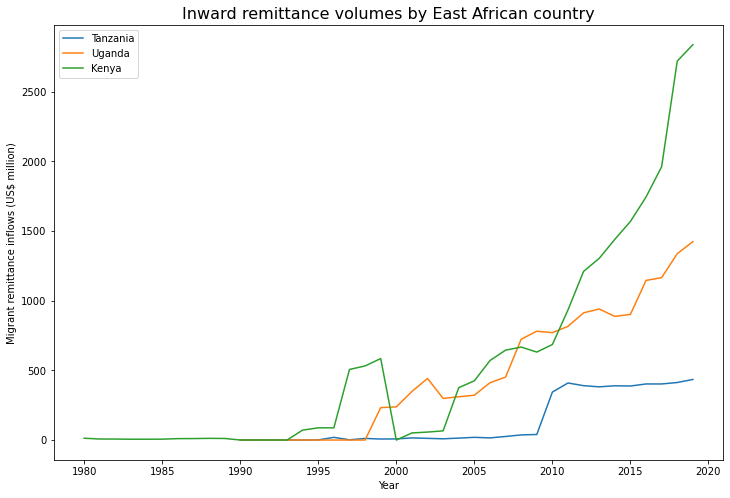

In [266]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.axes()
ax1.plot(df_e)
plt.title("Inward remittance volumes by East African country",size=16)
plt.xlabel("Year")
plt.ylabel("Migrant remittance inflows (US$ million)")
ax1.legend(df_e)

### Remittances to South Asian countries

In [267]:
# And same thing for South Asian countries
df_sa = pd.DataFrame()
for i in s_asia_c:
    add = df[[i]].copy()
    df_sa = pd.concat([df_sa, add], axis=1)
df_sa.head(2)

Year,Bangladesh,Sri Lanka
1980,339,152
1981,381,230


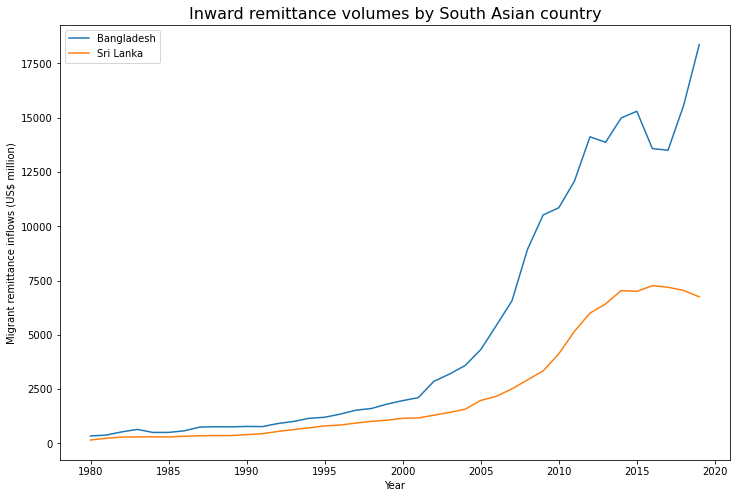

In [268]:
fig = plt.figure(figsize=(12,8))
ax2 = plt.axes()
ax2.plot(df_sa)
plt.title("Inward remittance volumes by South Asian country",size=16)
plt.xlabel("Year")
plt.ylabel("Migrant remittance inflows (US$ million)")
ax2.legend(df_sa)

## Combining plots together, using same scale for comparability

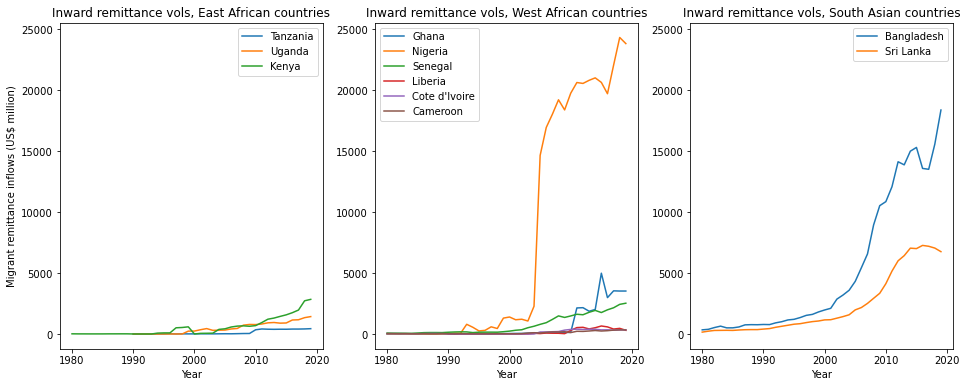

In [269]:
fig = plt.figure(figsize=(16,6))

# East African
ax2 = plt.subplot(1, 3, 1,sharey=ax0)
ax2.plot(df_e)
plt.title("Inward remittance vols, East African countries")
plt.xlabel("Year")
plt.ylabel("Migrant remittance inflows (US$ million)")
ax2.legend(df_e)

# West African
ax0 = plt.subplot(1, 3, 2)
ax0.plot(df_w)
plt.title("Inward remittance vols, West African countries")
plt.xlabel("Year")
ax0.legend(df_w)

# South Asian
ax1 = plt.subplot(1, 3, 3,sharey=ax0)
ax1.plot(df_sa)
plt.title("Inward remittance vols, South Asian countries")
plt.xlabel("Year")
ax1.legend(df_sa)

# Print to screen
plt.show()

# Migration data

In this section I look at migration data to get a rough sense of how much different groups and channels might be sending. 

Source data is [Global Bilateral Migration Database](https://datacatalog.worldbank.org/dataset/global-bilateral-migration-database). 

In [270]:
# downloading and opening files here
g_mig = pd.read_excel('/Users/bendixon/Documents/GitHub/python-sandbox/bilateral_migration_matrix_ghana.xlsx')
n_mig = pd.read_excel('/Users/bendixon/Documents/GitHub/python-sandbox/bilateral_migration_matrix_nigeria.xlsx')

### Starting with Ghanian migration data

In [271]:
g_mig.head(5)

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960 [1960],1970 [1970],1980 [1980],1990 [1990],2000 [2000]
0,Ghana,GHA,Female,FEM,Afghanistan,AFG,0,2,1,2,4
1,Ghana,GHA,Female,FEM,Albania,ALB,0,0,0,0,0
2,Ghana,GHA,Female,FEM,Algeria,DZA,0,0,0,0,0
3,Ghana,GHA,Female,FEM,American Samoa,ASM,0,0,0,0,0
4,Ghana,GHA,Female,FEM,Andorra,AND,0,0,1,3,4


In [272]:
g_mig = g_mig.rename(columns={"1960 [1960]": "1960","1970 [1970]": "1970", "1980 [1980]": "1980",
                             "1990 [1990]": "1990", "2000 [2000]": "2000"})

g_mig['2000'] = g_mig['2000'].replace('..','0').astype(float) # Had to do some wrangling to get the right format
g_mig['1990'] = g_mig['1990'].replace('..','0').astype(float) 

In [273]:
# Ghanian migration count
g_1990 = g_mig['1990'].sum()
g_2000 = g_mig['2000'].sum()
print("1990 value: ",g_1990)
print("2000 value: ",g_2000)

1990 value:  771592.0
2000 value:  958491.0


In [274]:
# Data has same format for Nigeria
n_mig = n_mig.rename(columns={"1960 [1960]": "1960","1970 [1970]": "1970", "1980 [1980]": "1980",
                             "1990 [1990]": "1990", "2000 [2000]": "2000"})
n_mig['2000'] = n_mig['2000'].replace('..','0').astype(float) # Had to do some wrangling to get the right format
n_mig['1990'] = n_mig['1990'].replace('..','0').astype(float) 

In [275]:
n_1990 = n_mig['1990'].sum()
n_2000 = n_mig['2000'].sum()
print("1990 value: ",n_1990)
print("2000 value: ",n_2000) 

1990 value:  866523.0
2000 value:  1318409.0


In [276]:
n_2000 / g_2000 # Nigeria only has 38% more migration than Ghana

1.3755048299879706

In [277]:
mig = pd.read_excel('/Users/bendixon/Documents/GitHub/python-sandbox/bilateral_migration_matrix_all.xlsx')

In [278]:
# Tidying up the Excel import 
mig = mig.rename(columns={"1960 [1960]": "1960","1970 [1970]": "1970", "1980 [1980]": "1980",
                             "1990 [1990]": "1990", "2000 [2000]": "2000"}) 
mig['2000'] = mig['2000'].replace('..','0').astype(float) 
mig = mig.iloc[1:7625,:] 
mig.head(-1)

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960,1970,1980,1990,2000
1,Bangladesh,BGD,Female,FEM,Albania,ALB,0,0,0,0,0.0
2,Bangladesh,BGD,Female,FEM,Algeria,DZA,0,0,0,0,0.0
3,Bangladesh,BGD,Female,FEM,American Samoa,ASM,0,0,0,0,0.0
4,Bangladesh,BGD,Female,FEM,Andorra,AND,0,0,0,0,2.0
5,Bangladesh,BGD,Female,FEM,Angola,AGO,3,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7619,Cameroon,CMR,Total,TOT,West Bank and Gaza,PSE,0,0,0,0,0.0
7620,Cameroon,CMR,Total,TOT,"Yemen, Rep.",YEM,0,0,0,0,0.0
7621,Cameroon,CMR,Total,TOT,Zambia,ZMB,0,0,5,10,9.0
7622,Cameroon,CMR,Total,TOT,Zimbabwe,ZWE,186,240,226,214,196.0


In [279]:
# Pivotting to sum migrants by country of origin
mig_table = pd.pivot_table(mig, index='Country Origin Name', values='2000', aggfunc='sum')
mig_table

,2000
Country Origin Name,
Bangladesh,9958536.0
Cameroon,276272.0
Cote d'Ivoire,1098157.0
Ghana,958491.0
Kenya,748435.0
Liberia,529092.0
Nigeria,1318409.0
Senegal,671877.0
Sri Lanka,1560773.0


# Combining migration with remittances data to get volumes per migrant

In [280]:
# Concatenate the dataframes for each country group made so far
df3 = pd.concat([df_w, df_e, df_sa], axis=1) # df_w etc are for remittance volume
df3.head()

Year,Ghana,Nigeria,Senegal,Liberia,Cote d'Ivoire,Cameroon,Tanzania,Uganda,Kenya,Bangladesh,Sri Lanka
1980,0.9,21.9466,77.0543,NaN,32.1848,29.3923,NaN,NaN,12.9377,339,152
1981,1.4,16.1889,68.1923,NaN,30.9129,28.7048,NaN,NaN,7.40536,381,230
1982,1.5,17.8184,66.3104,NaN,28.91,19.0197,NaN,NaN,7.04978,527,289
1983,0.5,13.8043,58.9662,NaN,27.0294,28.0004,NaN,NaN,5.70934,642,295
1984,4.7,11.7413,53.7582,NaN,24.9453,14.8298,NaN,NaN,5.82772,501,301


In [281]:
df3 = df3.iloc[20:31,] # Chopping to only get from year 2000 to 2010

In [282]:
df3

Year,Ghana,Nigeria,Senegal,Liberia,Cote d'Ivoire,Cameroon,Tanzania,Uganda,Kenya,Bangladesh,Sri Lanka
2000,32.3968,1391.83,234.067,0,0,22.1551,8.00001,238.1,0,1967.53,1154.29
2001,45.9091,1166.61,304.945,0,0,16.8463,15.253,348.6,50.9144,2104.55,1169.81
2002,43.52,1208.96,346.123,0,0,29.5955,12,441.83,57.1435,2858.06,1296.07
2003,65.1001,1062.82,512.08,0,0,75.5841,8.9,298.785,65.8453,3191.66,1423.47
2004,82.3712,2272.73,634.032,58.4469,0,103.575,13.7984,310.532,375.811,3583.82,1573.78
2005,99.1846,14640.1,789.2,31.855,163.239,77.0192,19.3663,321.808,424.991,4314.5,1975.54
2006,105.253,16932.1,926.065,78.8149,166.91,130.059,15.3807,411,570.459,5427.52,2166.77
2007,117.364,18014.4,1193.38,61.9772,184.937,167.56,25.4614,451.572,645.217,6562.32,2507.3
2008,126.105,19200,1482.09,58.1222,199.721,162.67,36.8197,723.521,667.312,8940.61,2924.5
2009,114.456,18370.8,1355.83,25.1169,316.346,185.112,39.8271,781.097,631.471,10520.7,3336.7


In [283]:
# Getting the mean of all these values
df4 = df3.mean(axis=0)
df4 = pd.DataFrame(df4)
df4 # This gives us average remittance inflow by country, Nigeria still very much in the lead

,0
Year,
Ghana,87.955572
Nigeria,10364.103613
Senegal,841.538770
Liberia,55.321190
Cote d'Ivoire,127.726832
Cameroon,98.649775
Tanzania,49.009694
Uganda,463.421412
Kenya,379.538239


## Putting it all together, migration data and remittances volume

In [284]:
# Now we include back in the values from earlier  
join = pd.concat([df4, mig_table], axis=1) # df_w etc are for remittance volume
join = join.rename(columns={0: "Remittances inward ($M)","2000": "Migration in 2000"})

In [285]:
# Changing the units to make it easier to read
join['Remittances per migrant'] = join['Remittances inward ($M)'] / join['Migration in 2000'] * 1000000
join['Migration in 2000'] = join['Migration in 2000'] / 1000
join = join.rename(columns={"Migration in 2000":"Migration in 2000 (thousands)"})
join = join.sort_values(by=['Remittances per migrant'])

In [286]:
join.round(0)

,Remittances inward ($M),Migration in 2000 (thousands),Remittances per migrant
Ghana,88.0,958.0,92.0
Tanzania,49.0,489.0,100.0
Liberia,55.0,529.0,105.0
Cote d'Ivoire,128.0,1098.0,116.0
Cameroon,99.0,276.0,357.0
Uganda,463.0,1068.0,434.0
Kenya,380.0,748.0,507.0
Bangladesh,5484.0,9959.0,551.0
Senegal,842.0,672.0,1253.0
Sri Lanka,2150.0,1561.0,1378.0


In [287]:
ri = join['Remittances inward ($M)']
m = join['Migration in 2000 (thousands)']
rpm = join['Remittances per migrant']

In [288]:
join

,Remittances inward ($M),Migration in 2000 (thousands),Remittances per migrant
Ghana,87.955572,958.491,91.764630
Tanzania,49.009694,488.884,100.248104
Liberia,55.321190,529.092,104.558734
Cote d'Ivoire,127.726832,1098.157,116.310174
Cameroon,98.649775,276.272,357.074821
Uganda,463.421412,1068.496,433.713755
Kenya,379.538239,748.435,507.109153
Bangladesh,5483.766185,9958.536,550.659875
Senegal,841.538770,671.877,1252.519092
Sri Lanka,2150.122869,1560.773,1377.601271


## Putting it all together

### Data shown  
* migration data from the UN dated 2000 (unclear if this is per decade or year)
* remittances inward by country (see above for methodological limitations, including exclusion of mobile payment operators)
* an estimate of remittances sent per migrant, relevant for unit economics

### Key findings
By sorting by the estimate of remittances sent per migrant, this very crude measure implies that Nigeria, Sri Lanka, and Senegal are possibly the countries with the largest total markets. 

Text(0.5, 0, 'Country of migrant origin/remittances received')

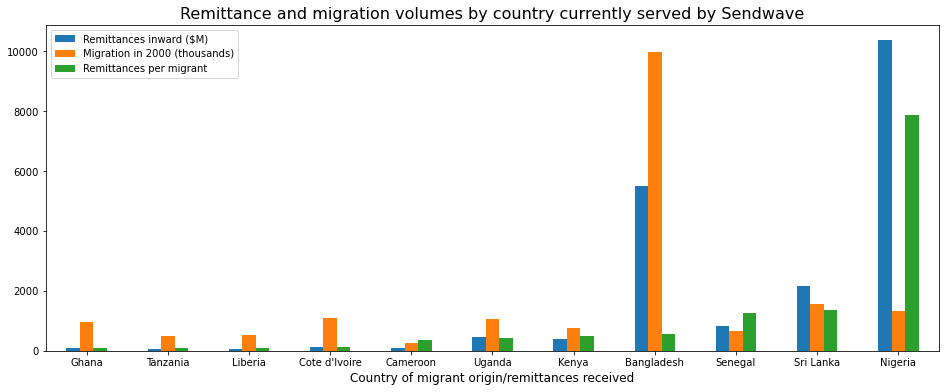

In [289]:
ax = join.plot.bar(figsize=(16,6), rot=0)
ax.set_title('Remittance and migration volumes by country currently served by Sendwave',size=16)
ax.set_xlabel('Country of migrant origin/remittances received',size=12)